In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2582,spam,3 FREE TAROT TEXTS! Find out about your love l...,NaN,NaN,NaN
1271,ham,If you still havent collected the dough pls le...,NaN,NaN,NaN
2379,ham,"Good evening Sir, hope you are having a nice d...",NaN,NaN,NaN
3455,ham,Ok. I.ll do you right later.,NaN,NaN,NaN
1322,ham,Oh just getting even with u.... u?,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

# Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
df.sample(5)

,v1,v2
5193,ham,"It's wylie, you in tampa or sarasota?"
110,ham,What is the plural of the noun research?
4914,ham,We took hooch for a walk toaday and i fell ove...
5429,ham,"Er yeah, i will b there at 15:26, sorry! Just ..."
4307,ham,Ha ha - had popped down to the loo when you he...


In [8]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
3657,ham,R u here yet? I'm wearing blue shirt n black p...
2875,ham,Fuck cedar key and fuck her (come over anyway ...
4204,spam,IMPORTANT INFORMATION 4 ORANGE USER 0796XXXXXX...
276,ham,Tell rob to mack his gf in the theater
1166,ham,I am not having her number sir


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
# check for duplicate values
df.duplicated().sum()

np.int64(403)

In [14]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

np.int64(0)

In [16]:
df.shape

(5169, 2)

# EDA

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

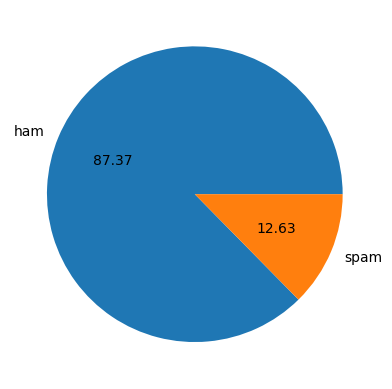

In [19]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

### Data is imbalanced

In [22]:
df['num_characters'] = df['text'].apply(len)

In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [30]:
import spacy

nlp = spacy.load('en_core_web_sm')

def count_words(text):
    doc = nlp(text)
    return len([token for token in doc if not token.is_punct and not token.is_space])

df['num_words'] = df['text'].apply(count_words)


In [31]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,30
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14


In [33]:

# Sentence count function using SpaCy
def count_sentences(text):
    doc = nlp(text)
    return len(list(doc.sents))  # SpaCy's sentence segmentation

# Apply to your dataframe
df['num_sentences'] = df['text'].apply(count_sentences)


In [34]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,30,2
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1


In [35]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.731476,2.100987
std,58.236293,11.269525,1.456628
min,2.000000,0.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,23.000000,3.000000
max,910.000000,179.000000,27.000000


In [36]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.498671,1.961913
std,56.358207,11.311134,1.400953
min,2.000000,0.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,2.000000
75%,90.000000,19.000000,2.000000
max,910.000000,179.000000,27.000000


In [37]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,24.257274,3.062787
std,30.137753,6.112541,1.471835
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,26.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,40.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

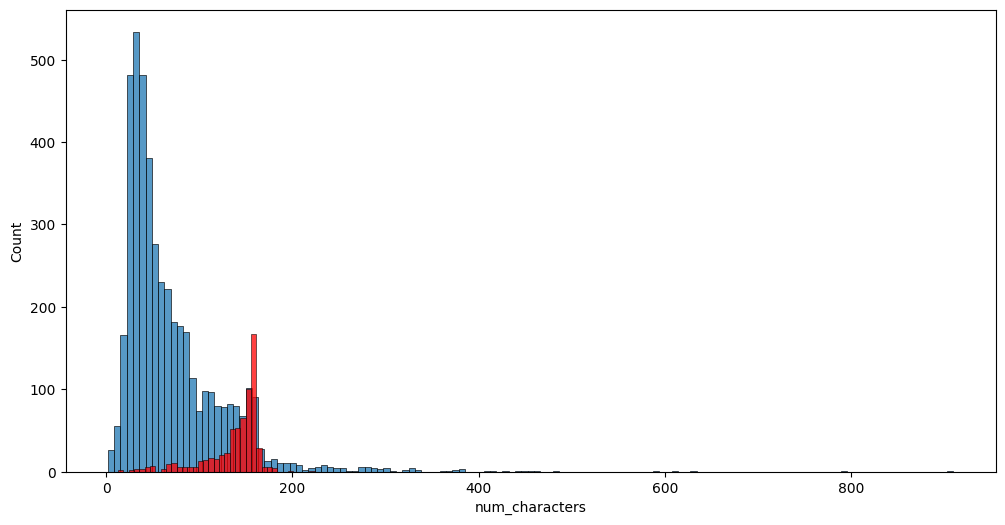

In [38]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

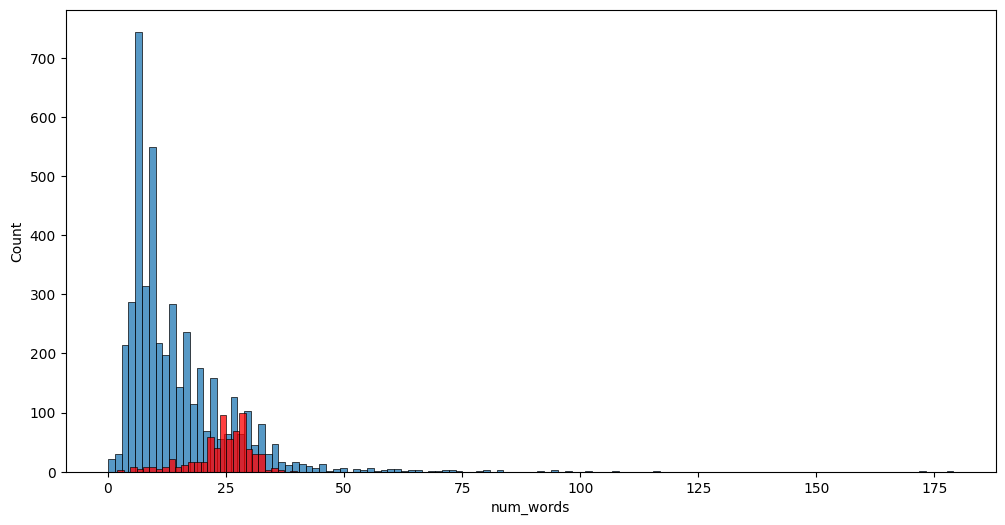

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

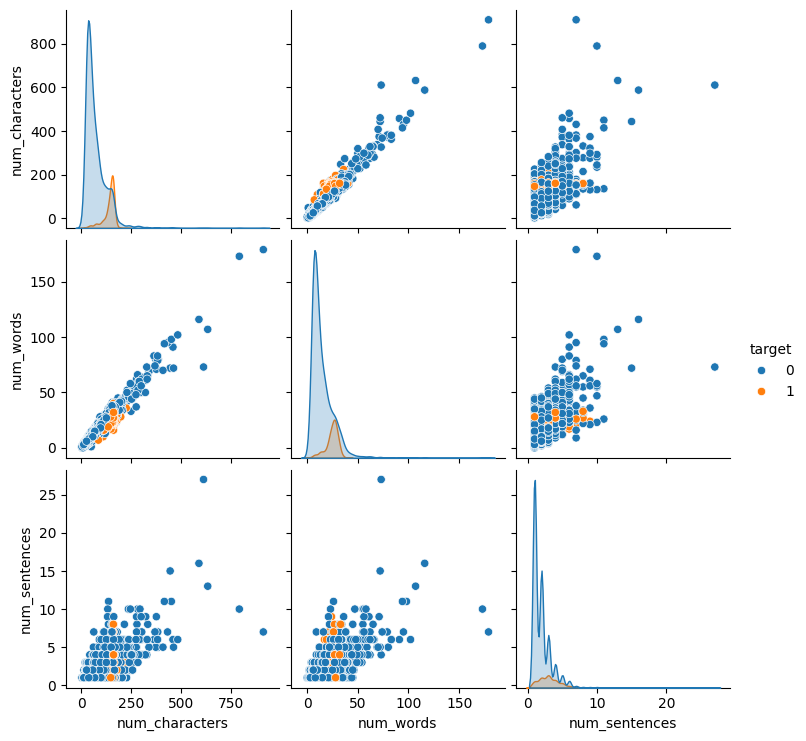

In [40]:
sns.pairplot(df,hue='target')

# 3. Data Preprocessing
### Lower case
### Tokenization
### Removing special characters
### Removing stop words and punctuation
### Stemming

In [46]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import string

# Load SpaCy model
nlp = spacy.load('en_core_web_sm')

def transform_text(text):
    text = text.lower()
    doc = nlp(text)
    
    y = []
    for token in doc:
        if token.is_alpha and token.text not in STOP_WORDS:
            # Use SpaCy lemmatizer (better than stemming)
            y.append(token.lemma_)
    
    return " ".join(y)


In [47]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'go to home soon want talk stuff anymore tonight k cry today'

In [48]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [51]:
df['transformed_text'] = df['text'].apply(transform_text)

In [52]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,30,2,free entry wkly comp win fa cup final tkts tex...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah think go usf live


In [58]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [59]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


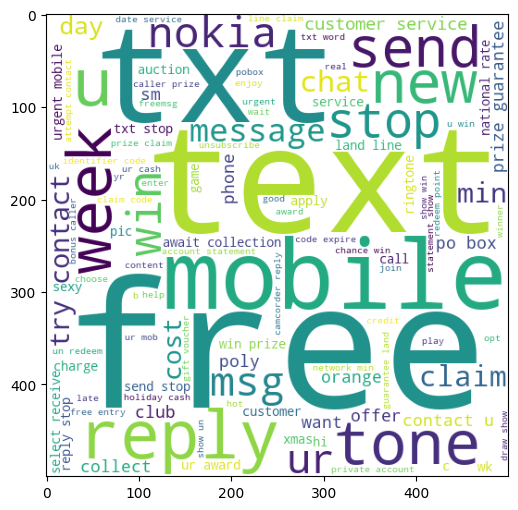

In [60]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

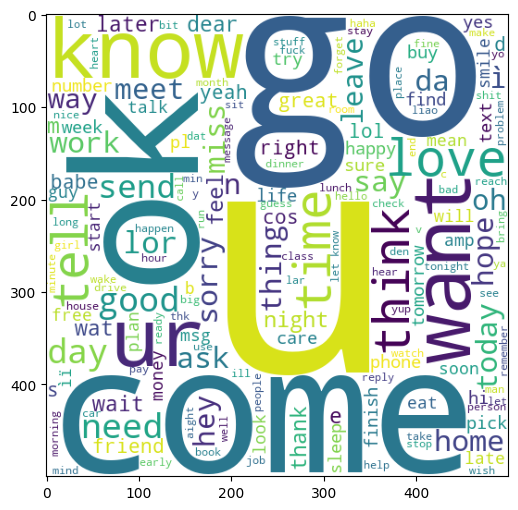

In [61]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [62]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,30,2,free entry wkly comp win fa cup final tkts tex...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah think go usf live


In [63]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [64]:
len(spam_corpus)

7582

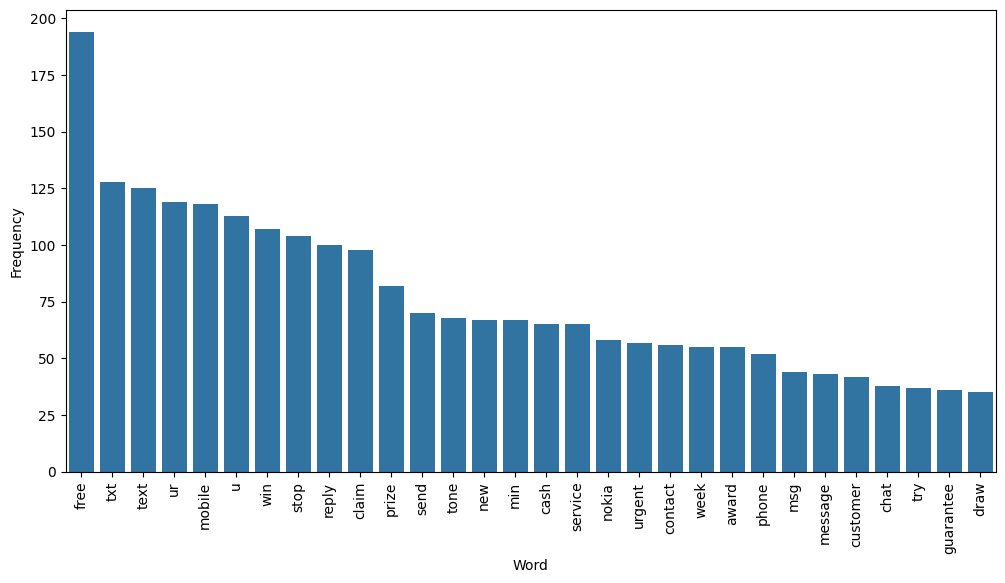

In [68]:
from collections import Counter
import matplotlib.pyplot as plt

# Get top 30 words
word_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Word', y='Frequency', data=word_freq)
plt.xticks(rotation='vertical')
plt.show()


In [69]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [70]:
len(ham_corpus)

29879

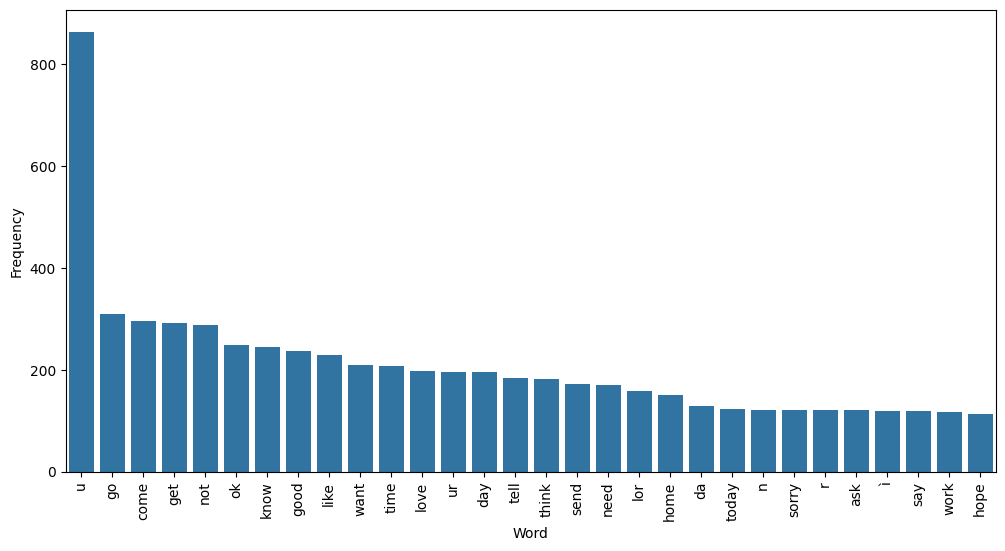

In [71]:
# Get top 30 words
word_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='Word', y='Frequency', data=word_freq)
plt.xticks(rotation='vertical')
plt.show()


In [72]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,jurong point crazy available bugis n great wor...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,30,2,free entry wkly comp win fa cup final tkts tex...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun early hor u c
4,0,"Nah I don't think he goes to usf, he lives aro...",61,14,1,nah think go usf live


# Model Building

In [123]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [124]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [125]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [126]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [127]:
X.shape

(5169, 3000)

In [128]:

y = df['target'].values

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [131]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [132]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [133]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8268858800773694
[[742 154]
 [ 25 113]]
0.4232209737827715


In [161]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.965183752417795
[[895   1]
 [ 35 103]]
0.9903846153846154


In [135]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.97678916827853
[[892   4]
 [ 20 118]]
0.9672131147540983


In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [137]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [138]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [139]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [140]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9700193423597679, 0.9495798319327731)

In [141]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9700193423597679
Precision -  0.9495798319327731
For  KN
Accuracy -  0.9129593810444874
Precision -  1.0
For  NB
Accuracy -  0.965183752417795
Precision -  0.9903846153846154
For  DT
Accuracy -  0.925531914893617
Precision -  0.8426966292134831
For  LR
Accuracy -  0.9545454545454546
Precision -  0.9333333333333333
For  RF
Accuracy -  0.9709864603481625
Precision -  0.9655172413793104
For  AdaBoost
Accuracy -  0.9003868471953579
Precision -  0.9069767441860465
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.88
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9508196721311475
For  GBDT
Accuracy -  0.9448742746615088
Precision -  0.9550561797752809
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9482758620689655


In [142]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [143]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912959,1.000000
2,NB,0.965184,0.990385
5,RF,0.970986,0.965517
9,GBDT,0.944874,0.955056
8,ETC,0.972921,0.950820
0,SVC,0.970019,0.949580
10,xgb,0.967118,0.948276
4,LR,0.954545,0.933333
6,AdaBoost,0.900387,0.906977
7,BgC,0.958414,0.880000


In [144]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [145]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912959
1,NB,Accuracy,0.965184
2,RF,Accuracy,0.970986
3,GBDT,Accuracy,0.944874
4,ETC,Accuracy,0.972921
5,SVC,Accuracy,0.970019
6,xgb,Accuracy,0.967118
7,LR,Accuracy,0.954545
8,AdaBoost,Accuracy,0.900387
9,BgC,Accuracy,0.958414


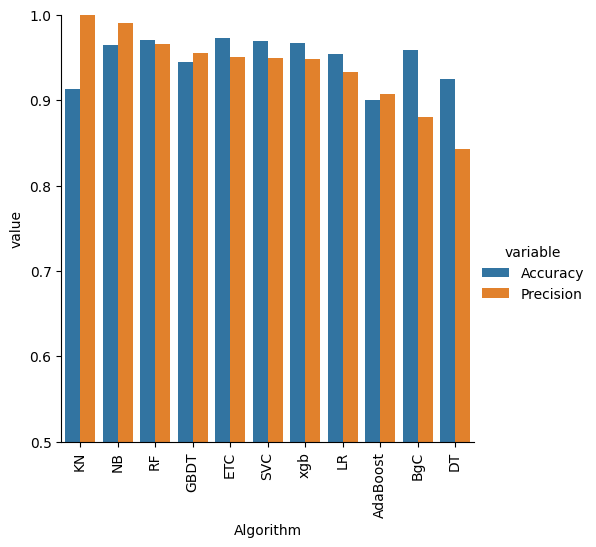

In [146]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [147]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [148]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [149]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [150]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [151]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [152]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.912959,1.000000,0.912959,1.000000,0.912959,1.000000,0.912959,1.000000
1,NB,0.965184,0.990385,0.965184,0.990385,0.965184,0.990385,0.965184,0.990385
2,RF,0.970986,0.965517,0.970986,0.965517,0.970986,0.965517,0.970986,0.965517
3,GBDT,0.944874,0.955056,0.944874,0.955056,0.944874,0.955056,0.944874,0.955056
4,ETC,0.972921,0.950820,0.972921,0.950820,0.972921,0.950820,0.972921,0.950820
5,SVC,0.970019,0.949580,0.970019,0.949580,0.970019,0.949580,0.970019,0.949580
6,xgb,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276,0.967118,0.948276
7,LR,0.954545,0.933333,0.954545,0.933333,0.954545,0.933333,0.954545,0.933333
8,AdaBoost,0.900387,0.906977,0.900387,0.906977,0.900387,0.906977,0.900387,0.906977
9,BgC,0.958414,0.880000,0.958414,0.880000,0.958414,0.880000,0.958414,0.880000


In [153]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [154]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [155]:
voting.fit(X_train,y_train)

,estimators,"[('svm', ...), ('nb', ...), ...]"
,voting,'soft'
,weights,None
,n_jobs,None
,flatten_transform,True
,verbose,False
,C,1.0
,kernel,'sigmoid'
,degree,3
,gamma,1.0
,coef0,0.0


In [156]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9831932773109243


In [157]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [158]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9738878143133463
Precision 0.9302325581395349


In [163]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))